### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from math import ceil
from scipy import stats
from numpy import inf
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler, LabelEncoder
from math import ceil
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LassoCV, RidgeCV, LogisticRegression, LinearRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier


C:\Users\Antonio\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import the excel files 

In [2]:
data=pd.read_csv(r'C:\Users\Antonio\Desktop\BC2_predicting_cancellations\H2.csv')

### Understand the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [4]:
data.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [5]:
# Define metric and non-metric features
non_metric_features = ['IsCanceled','ArrivalDateYear','ArrivalDateMonth','ArrivalDateWeekNumber','ArrivalDateDayOfMonth','Meal','Country','MarketSegment','DistributionChannel','IsRepeatedGuest','ReservedRoomType','AssignedRoomType','DepositType','Company','Agent','CustomerType','ReservationStatus','ReservationStatusDate']
metric_features = data.columns.drop(non_metric_features).to_list()
# C

In [6]:
data

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,...,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,...,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,...,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [7]:
# Summary statistics for all variables
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IsCanceled,79330,NaN,NaN,NaN,0.41727,0.493111,0,0,0,1,1
LeadTime,79330,NaN,NaN,NaN,109.736,110.949,0,23,74,163,629
ArrivalDateYear,79330,NaN,NaN,NaN,2016.17,0.699181,2015,2016,2016,2017,2017
ArrivalDateMonth,79330,12,August,8983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArrivalDateWeekNumber,79330,NaN,NaN,NaN,27.1774,13.3985,1,17,27,38,53
ArrivalDateDayOfMonth,79330,NaN,NaN,NaN,15.7866,8.72845,1,8,16,23,31
StaysInWeekendNights,79330,NaN,NaN,NaN,0.795185,0.885026,0,0,1,2,16
StaysInWeekNights,79330,NaN,NaN,NaN,2.18296,1.45642,0,1,2,3,41
Adults,79330,NaN,NaN,NaN,1.85098,0.509292,0,2,2,2,4
Children,79326,NaN,NaN,NaN,0.0913698,0.372177,0,0,0,0,3


In [8]:
# Check missing values
data.isnull().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [9]:
# Check duplicated observations
data[data.duplicated()]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
9,1,62,2015,July,27,2,2,3,2,0.0,...,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02
12,0,43,2015,July,27,3,0,2,2,0.0,...,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
17,0,43,2015,July,27,3,0,2,2,0.0,...,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
18,0,43,2015,July,27,3,0,2,2,0.0,...,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
22,0,43,2015,July,27,3,0,2,2,0.0,...,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79289,0,186,2017,August,35,31,0,3,2,0.0,...,No Deposit,9,NULL,0,Transient,126.00,0,2,Check-Out,2017-09-03
79292,0,63,2017,August,35,31,0,3,3,0.0,...,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79293,0,63,2017,August,35,31,0,3,3,0.0,...,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79294,0,63,2017,August,35,31,0,3,3,0.0,...,No Deposit,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


# All Numeric Variables' Box Plots in one figure
sns.set()
# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))
# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.show()

# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features):
    sns.histplot(x=data[feat], hue=data['IsCanceled'], stat='density', common_norm=False, ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms by Target"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.4)

plt.show()

# Pairwise Relationship of Numerical Variables
sns.set()
features = metric_features + ['IsCanceled']

# Setting pairplot
sns.pairplot(data=data[features], hue='IsCanceled', diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables by Target", fontsize=20)

plt.show()

# All Non-Metric/ Low Cardinality Variables' Absolute Frequencies
sns.set()

features = non_metric_features 
# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3, ceil(len(features) / 3), figsize=(21, 17))

# Plot data
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), features):
    sns.countplot(x=data[feat], ax=ax)

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)
# Rotating X-axis labels
axes.flatten()[0].tick_params(axis='x', labelrotation = 90)
axes.flatten()[2].tick_params(axis='x', labelrotation = 90)
plt.subplots_adjust(wspace=0.3, hspace=0.7)

plt.show()

# All Non-Metric/ Low Cardinality Variables' Relative Frequencies by Target
sns.set()

features = non_metric_features 
features.remove('IsCanceled')
# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3, ceil(len(features) / 3), figsize=(21, 17))

# Plot data
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), features):
    datag = data.groupby(['IsCanceled'])[feat].value_counts(normalize=True).rename('prop').reset_index()
    sns.barplot(data=datag, x=feat, y='prop', hue='IsCanceled', ax=ax)

title = "Categorical/Low Cardinality Variables' Relative Frequencies by Target"
plt.suptitle(title)
# Rotating X-axis labels
axes.flatten()[0].tick_params(axis='x', labelrotation = 90)
axes.flatten()[2].tick_params(axis='x', labelrotation = 90)
axes.flatten()[-1].remove()
plt.subplots_adjust(wspace=0.3, hspace=0.7)

plt.show()

# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Pearson Correlation Matrix", fontsize=20)

plt.show()

# Data Preparation

### Feature Engineering 

In [10]:
data_FE=data.copy()

In [11]:
#creation of a changeroomtype
data_FE['changeroomtype'] = data_FE['AssignedRoomType'] != data_FE['ReservedRoomType']
data_FE['changeroomtype'] = data_FE['changeroomtype'].replace({True:1, False:0})

In [12]:
#creation of ADR
data_FE['ADRpp']=data_FE['ADR']/(data_FE['Adults']+data_FE['Children'])

In [13]:
#creation total number of previorus bookings 
data_FE['PreviousBookings']=data_FE['PreviousBookingsNotCanceled']+data_FE['PreviousCancellations']

In [14]:
#total number of days that were reserved
data_FE['totaldaysreserved']= data_FE['StaysInWeekendNights']+data_FE['StaysInWeekNights']

In [15]:
#children+babies per adult
data_FE['kidsperadult']=(data_FE['Children']+data_FE['Babies'])/data_FE['Adults']
#The case when a reservation has only children it means the adults are in another bedroom. For the sake of simplicity we 
#replaced the value 'inf' for zero.this will help us run the models afterwards.
data_FE['kidsperadult'] = data_FE['kidsperadult'].replace({inf:0})

In [16]:
#reservationstatusdate-separate by 3 columns- day,month,year
new = data_FE["ReservationStatusDate"].str.split("-", n = 2, expand = True) 
data_FE['ReservationStatusYEAR']= new[0]
data_FE['ReservationStatusMONTH']= new[1]
data_FE['ReservationStatusDAY']= new[2]
del data_FE['ReservationStatusDate']

#### Analysis of the metric variables

In [17]:
#With feature engineering, the team came up with an additional 5 metric variables.Therefore, they also have to be analyzed.
metric_features = ['LeadTime','StaysInWeekendNights','StaysInWeekNights','Adults','Children','Babies','PreviousCancellations','PreviousBookingsNotCanceled','BookingChanges','DaysInWaitingList','ADR','TotalOfSpecialRequests','ADRpp','PreviousBookings','totaldaysreserved','kidsperadult']

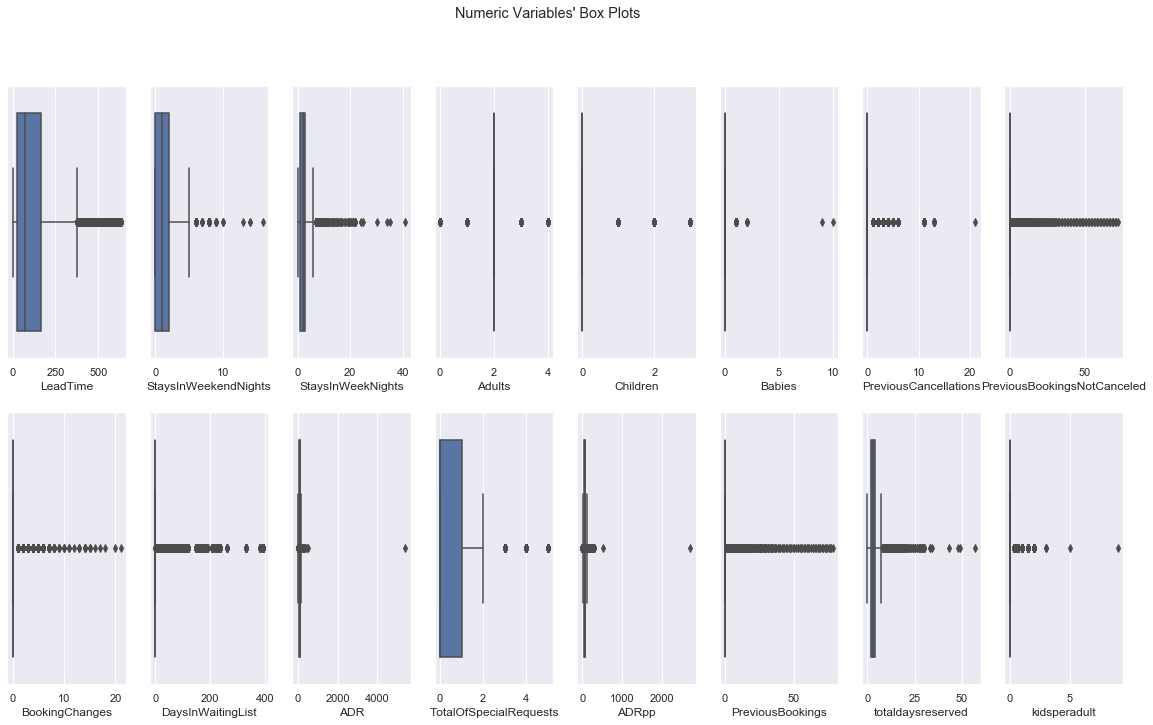

In [18]:
#boxplot
# All Numeric Variables' Box Plots in one figure
sns.set()
# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))
# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data_FE[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.show()

### Select data

In [19]:
#drop duplicates 
data_FE.drop_duplicates(inplace=True)
#drop DepositType
#data=data.drop(['DepositType'],axis=1)
del data_FE['DepositType']
#drop reservations with no adults nor children
data_FE.drop(data_FE[(data_FE['Adults']==0) & (data_FE['Children']==0)].index, inplace = True)

### Clean Data

In [20]:
data_clean=data_FE.copy()

### NaN values 

In [21]:
#erase from the dataset the observations that contain nan values 
data_clean=data_clean.dropna(axis=0)

#### 'Null' values 

In [22]:
 data_clean[data_clean=='       NULL'].count()

IsCanceled                         0
LeadTime                           0
ArrivalDateYear                    0
ArrivalDateMonth                   0
ArrivalDateWeekNumber              0
ArrivalDateDayOfMonth              0
StaysInWeekendNights               0
StaysInWeekNights                  0
Adults                             0
Children                           0
Babies                             0
Meal                               0
Country                            0
MarketSegment                      0
DistributionChannel                0
IsRepeatedGuest                    0
PreviousCancellations              0
PreviousBookingsNotCanceled        0
ReservedRoomType                   0
AssignedRoomType                   0
BookingChanges                     0
Agent                           5541
Company                        50502
DaysInWaitingList                  0
CustomerType                       0
ADR                                0
RequiredCarParkingSpaces           0
T

In [23]:
# Most of the values in 'Company' are 'NULL'.Therefore,to simplify our analysis we will change the value 'null' to 0 and the rest to 1.
data_clean.loc[data_clean['Company'] != '       NULL', 'Company'] = 1
data_clean.loc[data_clean['Company'] == '       NULL', 'Company'] = 0

#### Encode categorical variables 

In [24]:
#Updating the non_metric_features by adding the new features 
non_metric_features = ['IsCanceled','ArrivalDateYear','ArrivalDateMonth','ArrivalDateWeekNumber','ArrivalDateDayOfMonth','Meal','Country','MarketSegment','DistributionChannel','IsRepeatedGuest','ReservedRoomType','AssignedRoomType','Company','Agent','CustomerType','ReservationStatus','changeroomtype','ReservationStatusYEAR','ReservationStatusMONTH','ReservationStatusDAY']
data_clean[non_metric_features]

,IsCanceled,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,ReservedRoomType,AssignedRoomType,Company,Agent,CustomerType,ReservationStatus,changeroomtype,ReservationStatusYEAR,ReservationStatusMONTH,ReservationStatusDAY
0,0,2015,July,27,1,HB,PRT,Offline TA/TO,TA/TO,0,A,A,0,6,Transient,Check-Out,0,2015,07,03
1,1,2015,July,27,1,BB,PRT,Online TA,TA/TO,0,A,A,0,9,Transient,Canceled,0,2015,07,01
2,1,2015,July,27,1,BB,PRT,Online TA,TA/TO,0,A,A,0,9,Transient,Canceled,0,2015,04,30
3,1,2015,July,27,1,BB,PRT,Online TA,TA/TO,0,A,A,0,9,Transient,Canceled,0,2015,06,23
4,1,2015,July,27,2,BB,PRT,Online TA,TA/TO,0,A,A,0,9,Transient,Canceled,0,2015,04,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,2017,August,35,30,BB,BEL,Offline TA/TO,TA/TO,0,A,A,0,394,Transient,Check-Out,0,2017,09,06
79326,0,2017,August,35,31,BB,FRA,Online TA,TA/TO,0,E,E,0,9,Transient,Check-Out,0,2017,09,07
79327,0,2017,August,35,31,BB,DEU,Online TA,TA/TO,0,D,D,0,9,Transient,Check-Out,0,2017,09,07
79328,0,2017,August,35,31,BB,GBR,Online TA,TA/TO,0,A,A,0,89,Transient,Check-Out,0,2017,09,07


The variables that need One Hot encoding are:'Meal','Country','MarketSegment','DistributionChannel',
'ReservedRoomType','Agent','CustomerType','ReservationStatus','AssignedRoomType'.
Ordinal variables that need label enconding:ArrivalDateMonth


In [25]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(data_clean[['Meal','Country','MarketSegment','DistributionChannel','ReservedRoomType','AssignedRoomType','Agent','CustomerType','ReservationStatus']])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=data_clean.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
ohc_df.head(3)

,x0_FB,x0_HB,x0_SC,x1_AGO,x1_AIA,x1_ALB,x1_AND,x1_ARE,x1_ARG,x1_ARM,...,x6_ 480,x6_ 484,x6_ 495,x6_ 509,x6_ NULL,x7_Group,x7_Transient,x7_Transient-Party,x8_Check-Out,x8_No-Show
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
#Changing the months to numbers, from 1-12
data_clean.loc[data_clean['ArrivalDateMonth'] == 'January','ArrivalDateMonth'] = 1
data_clean.loc[data_clean['ArrivalDateMonth'] == 'February','ArrivalDateMonth'] = 2
data_clean.loc[data_clean['ArrivalDateMonth'] == 'March','ArrivalDateMonth'] = 3
data_clean.loc[data_clean['ArrivalDateMonth'] == 'April','ArrivalDateMonth'] = 4
data_clean.loc[data_clean['ArrivalDateMonth'] == 'May','ArrivalDateMonth'] = 5
data_clean.loc[data_clean['ArrivalDateMonth'] == 'June','ArrivalDateMonth'] = 6
data_clean.loc[data_clean['ArrivalDateMonth'] =='July','ArrivalDateMonth'] = 7
data_clean.loc[data_clean['ArrivalDateMonth'] == 'August','ArrivalDateMonth'] = 8
data_clean.loc[data_clean['ArrivalDateMonth'] == 'September','ArrivalDateMonth'] = 9
data_clean.loc[data_clean['ArrivalDateMonth'] =='October','ArrivalDateMonth'] = 10
data_clean.loc[data_clean['ArrivalDateMonth'] == 'November','ArrivalDateMonth'] = 11
data_clean.loc[data_clean['ArrivalDateMonth'] == 'December','ArrivalDateMonth'] = 12

In [27]:
# Reassigning data to contain ohc variables
data_clean = pd.concat([data_clean.drop(columns=['Meal','Country','MarketSegment','DistributionChannel','ReservedRoomType','Agent','CustomerType','ReservationStatus','AssignedRoomType']), ohc_df], axis=1)
data_clean.head(3)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,x6_ 480,x6_ 484,x6_ 495,x6_ 509,x6_ NULL,x7_Group,x7_Transient,x7_Transient-Party,x8_Check-Out,x8_No-Show
0,0,6,2015,7,27,1,0,2,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,88,2015,7,27,1,0,4,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,65,2015,7,27,1,0,4,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
data_clean['ArrivalDateMonth'] = data_clean['ArrivalDateMonth'].astype(float)
data_clean['Company'] = data_clean['Company'].astype(float)
data_clean['ReservationStatusYEAR'] = data_clean['ReservationStatusYEAR'].astype(float)
data_clean['ReservationStatusMONTH'] = data_clean['ReservationStatusMONTH'].astype(float)
data_clean['ReservationStatusDAY'] = data_clean['ReservationStatusDAY'].astype(float)

#### Outliers

In [29]:
data_out=data_clean.copy()

#### Manually-Univariate outliers

In [30]:
data_out['StaysInWeekendNights'].sort_values(ascending =False)

14644    14
22522    10
22523    10
63222     9
40911     9
         ..
60967     0
34755     0
34757     0
34780     0
0         0
Name: StaysInWeekendNights, Length: 53267, dtype: int64

In [31]:
data_out['StaysInWeekNights'].sort_values(ascending = False)

14644    34
63222    25
40911    24
22183    22
42038    22
         ..
6918      0
61991     0
61988     0
22719     0
72178     0
Name: StaysInWeekNights, Length: 53267, dtype: int64

In [32]:
data_out['PreviousCancellations'].sort_values(ascending= False)

33654    21
37290    13
37281    13
37279    13
37280    13
         ..
57944     0
57943     0
57942     0
57941     0
0         0
Name: PreviousCancellations, Length: 53267, dtype: int64

In [33]:
data_out['DaysInWaitingList'].sort_values(ascending = False)

18092    391
19335    391
19390    391
19025    391
19016    391
        ... 
57901      0
57900      0
57899      0
57898      0
0          0
Name: DaysInWaitingList, Length: 53267, dtype: int64

In [34]:
data_out['ADR'].sort_values(ascending = False)

8455     5400.00
71343     510.00
63852     451.50
63729     375.50
78455     372.33
          ...   
34661       0.00
34660       0.00
34659       0.00
34658       0.00
0           0.00
Name: ADR, Length: 53267, dtype: float64

In [35]:
data_out['totaldaysreserved'].sort_values(ascending = False)

14644    48
63222    34
40911    33
42586    30
22522    30
         ..
65238     0
45533     0
43658     0
55673     0
61124     0
Name: totaldaysreserved, Length: 53267, dtype: int64

In [36]:
data_out['kidsperadult'].sort_values(ascending = False)

38596    9.0
6559     5.0
40926    3.0
11135    3.0
75801    3.0
        ... 
56963    0.0
56962    0.0
56961    0.0
56960    0.0
0        0.0
Name: kidsperadult, Length: 53267, dtype: float64

In [37]:
filter1 = (
    (data_out['StaysInWeekendNights']<=10)
&
    (data_out['StaysInWeekNights']<=20)
&
    (data_out['PreviousCancellations']<=10)
&       
    (data_out['DaysInWaitingList']<=300)
&
    (data_out['ADR']<=400)
&
(data_out['totaldaysreserved']<=40)
&
(data_out['kidsperadult']<=8))
data_out1 = data_out[filter1]

In [38]:
print('Percentage of data kept after removing outliers:', np.round(data_out1.shape[0] / data_out.shape[0], 4))

Percentage of data kept after removing outliers: 0.9988


#### LOF

In [39]:
data_lof=data_out.copy()
clf = LocalOutlierFactor(contamination = 0.05)
lof = clf.fit_predict(data_out)
len(lof[lof==-1])
data_lof['LOF Outliers'] = lof

print('Percentage of data kept after removing outliers:', np.round(len(data_lof[data_lof['LOF Outliers']==1]) / data_out.shape[0],4))

Percentage of data kept after removing outliers: 0.95


In [40]:
#data without the outliers
data_LOF=data_lof[data_lof['LOF Outliers']==1]
del data_LOF['LOF Outliers']
#the outliers detected
outliers_LOF=data_lof[data_lof['LOF Outliers']==-1]

#### Isolation Forest

In [41]:
data_if=data_out.copy()
clf = IsolationForest(contamination=0.05,max_samples=100)
_if = clf.fit_predict(data_out)
data_if['IF Outliers'] = _if

print('Percentage of data kept after removing outliers:', np.round(len(data_if[data_if['IF Outliers']==1]) / data_out.shape[0],4))

C:\Users\Antonio\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\Antonio\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Percentage of data kept after removing outliers: 0.95


In [42]:
#data without the outliers
data_IF=data_if[data_if['IF Outliers']==1]
del data_IF['IF Outliers']
#the outliers detected
outliers_IF=data_lof[data_if['IF Outliers']==-1]

Datasets
None:data_out
Manual:data_out1
LOF:data_LOF
IF:data_IF

In [43]:
data_FS=data_IF.copy()

In [44]:
data_FS

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,x6_ 480,x6_ 484,x6_ 495,x6_ 509,x6_ NULL,x7_Group,x7_Transient,x7_Transient-Party,x8_Check-Out,x8_No-Show
0,0,6,2015,7.0,27,1,0,2,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,88,2015,7.0,27,1,0,4,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,65,2015,7.0,27,1,0,4,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,92,2015,7.0,27,1,2,4,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,100,2015,7.0,27,2,0,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,8.0,35,30,2,5,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
79326,0,102,2017,8.0,35,31,2,5,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
79327,0,34,2017,8.0,35,31,2,5,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
79328,0,109,2017,8.0,35,31,2,5,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Feature Selection

In [45]:
#Correlation w/ IsCanceled
data_FS.corr().abs()['IsCanceled'].sort_values(ascending=False).head(30)

IsCanceled                  1.000000
x8_Check-Out                1.000000
x6_          9              0.231504
changeroomtype              0.190945
LeadTime                    0.187646
x2_Online TA                0.172543
x8_No-Show                  0.168794
TotalOfSpecialRequests      0.167539
x3_TA/TO                    0.134026
x7_Transient                0.125531
x7_Transient-Party          0.121760
x2_Offline TA/TO            0.116611
RequiredCarParkingSpaces    0.112764
x3_Direct                   0.109738
totaldaysreserved           0.109079
StaysInWeekNights           0.106917
x2_Direct                   0.105706
x1_PRT                      0.104163
ReservationStatusMONTH      0.102919
x6_          7              0.099834
x6_       NULL              0.098128
x6_         28              0.092888
ArrivalDateYear             0.087388
x1_FRA                      0.085226
BookingChanges              0.084862
ADR                         0.077330
x6_         14              0.075066
A

In [46]:
#It seems that regardless of the outlier method used, the variable 'x8_Check-Out' is perfectly correlated with the 
#target which seems strange and it hinders our analysis.Therefore we will take it out 
del data_FS['x8_Check-Out']

In [47]:
top30 = list()
top30.append(data_FS.corr().abs()['IsCanceled'].sort_values(ascending=False).head(30))

In [48]:
top30

[IsCanceled                  1.000000
 x6_          9              0.231504
 changeroomtype              0.190945
 LeadTime                    0.187646
 x2_Online TA                0.172543
 x8_No-Show                  0.168794
 TotalOfSpecialRequests      0.167539
 x3_TA/TO                    0.134026
 x7_Transient                0.125531
 x7_Transient-Party          0.121760
 x2_Offline TA/TO            0.116611
 RequiredCarParkingSpaces    0.112764
 x3_Direct                   0.109738
 totaldaysreserved           0.109079
 StaysInWeekNights           0.106917
 x2_Direct                   0.105706
 x1_PRT                      0.104163
 ReservationStatusMONTH      0.102919
 x6_          7              0.099834
 x6_       NULL              0.098128
 x6_         28              0.092888
 ArrivalDateYear             0.087388
 x1_FRA                      0.085226
 BookingChanges              0.084862
 ADR                         0.077330
 x6_         14              0.075066
 Adults     

In [51]:
#RFE
target = data_FS['IsCanceled']
datafe = data_FS.copy().drop(['IsCanceled'], axis=1)

modelLR = LinearRegression()
rfe = RFE(estimator = modelLR, n_features_to_select = 30)
c = rfe.fit_transform(X = datafe, y = target)
modelLR.fit(X = datafe, y = target)
selected_features = pd.Series(rfe.support_, index = datafe.columns)
selected_features[selected_features.values==True]

StaysInWeekendNights           True
StaysInWeekNights              True
PreviousCancellations          True
PreviousBookingsNotCanceled    True
PreviousBookings               True
totaldaysreserved              True
x1_AND                         True
x1_BEN                         True
x1_GGY                         True
x1_GIB                         True
x1_GLP                         True
x1_HND                         True
x1_IMN                         True
x1_JEY                         True
x1_MAC                         True
x1_NIC                         True
x1_UMI                         True
x1_VGB                         True
x1_ZMB                         True
x1_ZWE                         True
x6_         47                 True
x6_         55                 True
x6_         60                 True
x6_         64                 True
x6_        235                 True
x6_        236                 True
x6_        270                 True
x6_        287              

In [52]:
top30.append(selected_features[selected_features.values==True].index)

In [53]:
#Lasso Regression
reg = LassoCV()
reg.fit(X = datafe, y = target)

C:\Users\Antonio\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Antonio\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.230442863512508, tolerance: 0.8382586406212935
  tol, rng, random, positive)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [54]:
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(datafe,target))

coef = pd.Series(reg.coef_, index = datafe.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")  

Best alpha using built-in LassoCV: 0.433864
Best score using built-in LassoCV: 0.042291
Lasso picked 2 variables and eliminated the other 442 variables


In [55]:
top30.append(coef[coef.values!=0].index)

In [56]:
#Ridge Regression
ridge = RidgeCV()
ridge.fit(X = datafe, y = target)
print('The alpha atribute using RidgeCV: %f' %ridge.alpha_)
print('The score using RidgeCV: %f' %ridge.score(datafe,target))
coef_ridge = pd.Series(ridge.coef_, index = datafe.columns)
coef_ridge.sort_values(ascending=False).head(30)

The alpha atribute using RidgeCV: 1.000000
The score using RidgeCV: 0.505037


ArrivalDateYear    1.875086
x8_No-Show         0.694935
x6_         78     0.556130
x6_        287     0.498911
x6_        341     0.474488
x6_         47     0.464670
x1_GIB             0.456007
x6_         60     0.438504
x1_AND             0.403914
x6_        326     0.385516
x6_        270     0.381491
x1_BEN             0.378665
x6_        235     0.368793
x1_HKG             0.364750
x1_ARE             0.354057
x6_          4     0.340914
x1_ZMB             0.339472
x6_         64     0.339398
x6_        236     0.328907
x6_        107     0.304031
x1_MAC             0.302920
x1_ZWE             0.300677
x6_        229     0.299146
x1_HND             0.295994
x1_UMI             0.285923
x1_IMN             0.275664
x6_         41     0.270188
x1_NIC             0.269119
x6_        403     0.260180
x6_        214     0.258696
dtype: float64

In [57]:
top30.append(coef_ridge.sort_values(ascending=False).head(20).index)

In [58]:
# Decision Tree Classifier
gini_importance = DecisionTreeClassifier().fit(datafe, target).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(datafe, target).feature_importances_

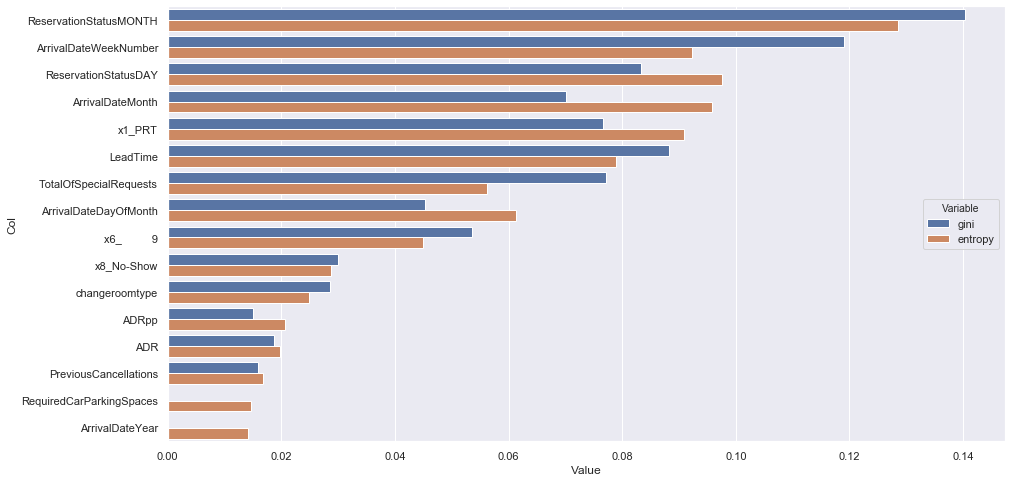

In [59]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = datafe.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy.head(30))

In [60]:
top30.append(tidy.sort_values(['Value'], ascending = False).head(30)['Col'].drop_duplicates().values)

In [61]:
onlyDT = tidy.sort_values(['Value'], ascending = False).head(30)['Col'].drop_duplicates().values.tolist()

In [62]:
series30 = pd.Series(top30) 
series30 = series30.explode().value_counts()
series30.head()

x8_No-Show                     3
x6_        287                 2
x6_         47                 2
x6_        236                 2
x1_AND                         2
x6_        270                 2
ADR                            2
x6_        235                 2
LeadTime                       2
x1_ZMB                         2
ArrivalDateYear                2
x6_         64                 2
x1_BEN                         2
PreviousCancellations          2
x6_         60                 2
x1_GIB                         2
x1_NIC                         1
0.10291884577474127            1
0.12553121673795659            1
0.10691684530937334            1
PreviousBookings               1
0.07733046521431321            1
0.07210250760582061            1
x6_        326                 1
ReservationStatusDAY           1
x6_        403                 1
0.06409256022723729            1
0.10416288103441869            1
ReservationStatusMONTH         1
PreviousBookingsNotCanceled    1
dtype: int

In [65]:
series30

x8_No-Show             3
x6_        287         2
x6_         47         2
x6_        236         2
x1_AND                 2
                      ..
0.10570602217036768    1
0.16879353996356586    1
changeroomtype         1
x1_GLP                 1
0.23150442560275802    1
Length: 81, dtype: int64

### Scaling

In [ ]:
independent_variables=data_out.drop(['IsCanceled'],axis=1)

In [ ]:
#min-max scaler
names = independent_variables.columns
# Create the Scaler object
scaler = MinMaxScaler()
# Fit your data on the scaler object
normalized_data = scaler.fit_transform(independent_variables)
normalized_data=pd.DataFrame(normalized_data,columns=names)

In [ ]:
#Standardization
names = independent_variables.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(independent_variables)
scaled_df = pd.DataFrame(scaled_df, columns=names) 

In [ ]:
#Robust Standardization
names = independent_variables.columns
# Create the Scaler object
scaler = RobustScaler()
# Fit your data on the scaler object
robuststd_data = scaler.fit_transform(independent_variables)
robuststd_data = pd.DataFrame(robuststd_data, columns=names) 

# Organization of the datasets
Storage of datasets with different outlier methods and normalization methods

In [ ]:
#DATAFRAME NONE
#normalized_data_NONE=normalized_data
#scaled_df_NONE=scaled_df
#robuststd_data_NONE=robuststd_data

In [ ]:
#DATAFRAME MANUAL
#normalized_data_MANUAL=normalized_data
#scaled_df_MANUAL=scaled_df
#robuststd_data_MANUAL=robuststd_data

In [ ]:
#DATAFRAME LOF
#normalized_data_LOF=normalized_data
#scaled_df_LOF=scaled_df
#robuststd_data_LOF=robuststd_data

In [ ]:
#DATAFRAME IF
#normalized_data_IF=normalized_data
#scaled_df_IF=scaled_df
#robuststd_data_IF=robuststd_data

# Model

# Hyperparameter tunning

In [ ]:
#param_grid = [
#  {'learning_rate':[0.1,0.3,0.5,0.8,1.0],
#    'n_estimators':[100,300,500],
#    'max_depth': [5,6,7,8],
#    'subsample':[0.1,0.3,0.5],
#    'min_samples_leaf':[5,7,10,12,15],
#    'min_samples_split':[200,250,300]
#  }]
#from sklearn.model_selection import GridSearchCV  
#grid_search = GridSearchCV(
#    estimator=clf, 
#    param_grid=param_grid, 
#    cv=5,
#    scoring='accuracy',
#    n_jobs=-1)
#
#grid_result= grid_search.fit(X_train, y_train)
#print('Best Params: ', grid_result.best_params_)
#print('Best Score: ', grid_result.best_score_)

# Classification report 

In [ ]:
# Test set classification report
print(classification_report(y_test, y_test_pred))

In [ ]:
# Test set confusion matrix
pd.DataFrame(data=confusion_matrix(y_test, y_test_pred), 
             index=pd.Index(y_train.unique(), name="True"), 
             columns=pd.Index(y_train.unique(), name="Pred"))

# Lift curve

In [ ]:
# Plot lift curves
predicted_probas = best_dt.predict_proba(X_test)

# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 9))
plot_cumulative_gain(y_test, predicted_probas, ax=ax1)
plot_lift_curve(y_test, predicted_probas, ax=ax2)  # Lift is a measure of the effectiveness of a predictive model
                                                   # calculated as the ratio between the results obtained with and 
                                                   # without the predictive model.
# properties
ax2.set_xlim(0.05, 1)
ax2.set_xticks([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
ax2.set_xticklabels([0.05, 0.2, 0.4, 0.6, 0.8, 1.0])
for ax in (ax1, ax2):
    ax.axes.lines[0].remove()
    ax.get_legend().remove()
    ax.legend()

plt.show()

### Oversampling

In [ ]:
data['IsCanceled'].value_counts()